In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

import re
import jax.numpy as jnp
from jax import grad, jit, partial
import ticktack
from ticktack import fitting
from tqdm import tqdm
import scipy

rcParams['figure.figsize'] = (8.0, 4.0)

In [21]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf = fitting.CarbonFitter(cbm)
cf.load_data('inject_recovery_gp.csv')
cf.prepare_function(use_control_points=True, interp='gp')

In [22]:
@jit
def gauss(t):
    prod =  1.87 + 0.2 * 1.87 * jnp.exp(-1/2*((t-250)/10)**2.)
    return prod

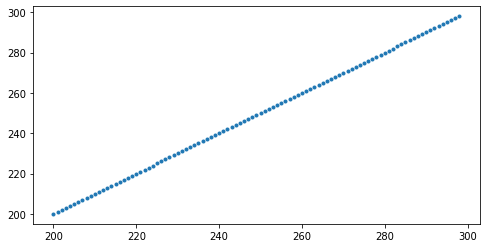

In [23]:
plt.plot(cf.time_data, cf.time_data, ".")

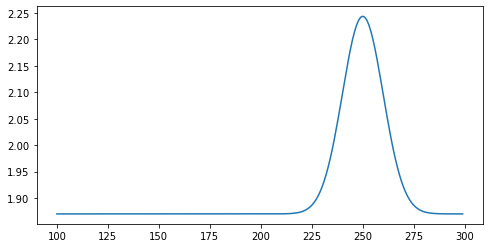

In [25]:
plt.plot(jnp.arange(100, 300), gauss(jnp.arange(100, 300)))

In [26]:
%%time
soln = cf.fit_cp(low_bound=0.)

CPU times: user 11min 4s, sys: 2.59 s, total: 11min 7s
Wall time: 10min 19s


In [27]:
soln.message

'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'

In [28]:
print("total likelihood: ", cf.gp_likelihood(soln.x))
print("gp likelihood: ", cf.gp_neg_log_likelihood(soln.x))
print("chi2: ", cf.loss_chi2(soln.x))

total likelihood:  77.71088669619637
gp likelihood:  77.70266879136449
chi2:  0.008217904831878932


Text(0.5, 1.0, 'gauss production rate')

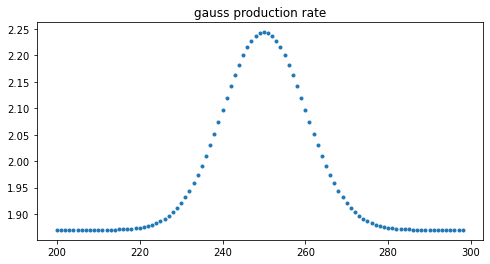

In [30]:
t = cf.control_points_time
true_cp = gauss(t)
plt.plot(t, gauss(t), ".")
plt.title('gauss production rate')

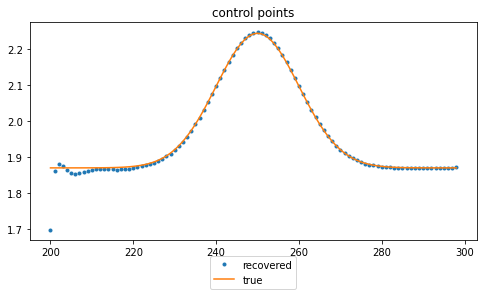

In [31]:
plt.plot(t, soln.x[:-1], ".", label="recovered")
plt.plot(t, true_cp, label='true')
plt.title("control points");
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True)

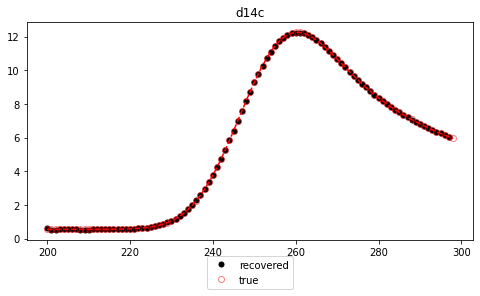

In [32]:
plt.plot(cf.time_data[:-1], cf.dc14(soln.x), ".k", label="recovered", markersize=10)
plt.plot(cf.time_data, cf.d14c_data, '--r')
plt.plot(cf.time_data, cf.d14c_data, 'or', fillstyle="none", label="true", alpha=0.5)
plt.title("d14c");
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True)